In [1]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

In [3]:
csv_list = []

for csv in glob.glob("../models/results/norm/*csv"):
    csv_list.append(csv)

# sort by momentum - [2], by max acc - [7]
csv_list = sorted(csv_list, key=lambda v: v.split('_')[2], reverse=True)

In [4]:

def plot_csv():
    for csv in csv_list:
        df = pd.read_csv(csv)
        idmin = df['val_loss'].idxmin()

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))

        title = 'SGD(lr=%s, momentum=%.2f, nesterov=True)\n\
            loss: %.4f - accuracy: %.4f - val_loss: %.4f - val_accuracy: %.4f' \
                % (format_e(float(csv.split('_')[1])), float(csv.split('_')[2]),

                   df.iloc[[idmin]].loss, df.iloc[[idmin]].accuracy,
                   df.iloc[[idmin]].val_loss, df.iloc[[idmin]].val_accuracy)
                    # csv.split('_')[7].split('.csv')[0] - best accuracy

        fig.set_facecolor("white")
        fig.suptitle((title), fontsize=16, color='black', backgroundcolor='white')

        ax1.plot(df['accuracy'])
        ax1.plot(df['val_accuracy'])
        ax1.set_xticks(np.arange(0, len(df['accuracy']) + 10, 20))
        ax1.set_yticks(np.arange(0, 1.1, 0.1))
        ax1.tick_params(axis='both', colors='black')

        ax1.set_ylabel('Acuracy')
        ax1.set_xlabel('Epochs')
        ax1.yaxis.label.set_color('black')
        ax1.yaxis.label.set_fontsize(14)
        ax1.xaxis.label.set_color('black')
        ax1.xaxis.label.set_fontsize(14)

        ax1.grid(axis = 'both')
        ax1.legend(['train', 'validation'], loc='upper left')

        ax2.plot(df['loss'])
        ax2.plot(df['val_loss'])
        ax2.set_xticks(np.arange(0, len(df['loss']) + 10, 20))
        ax2.set_yticks(np.arange(0, max(df['loss']) + 0.5, 0.3))
        ax2.tick_params(axis='both', colors='black')

        ax2.set_ylabel('Loss')
        ax2.set_xlabel('Epochs')
        ax2.yaxis.label.set_color('black')
        ax2.yaxis.label.set_fontsize(14)
        ax2.xaxis.label.set_color('black')
        ax2.xaxis.label.set_fontsize(14)

        ax2.grid(axis = 'both')
        ax2.legend(['train', 'validation'], loc='upper left')

        # plt.savefig('plot.png')

        # fig.show()

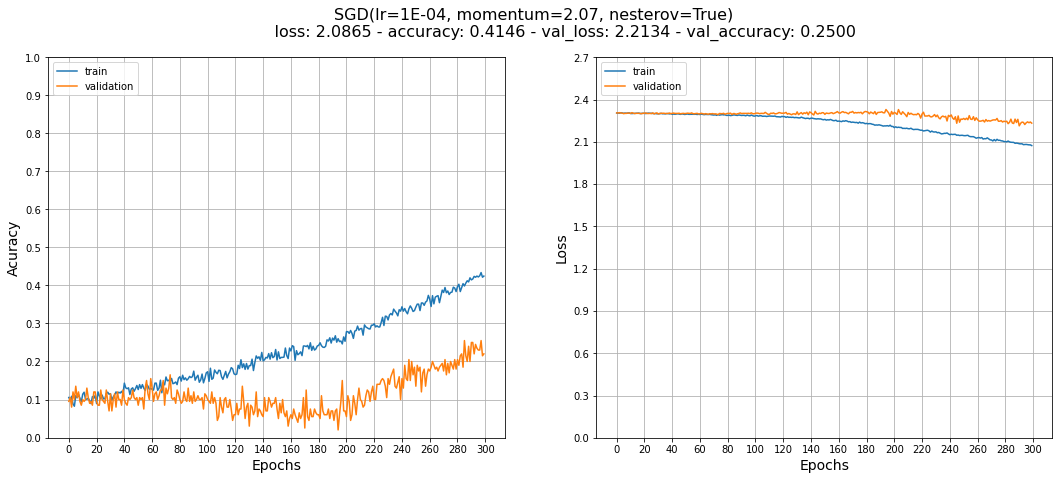

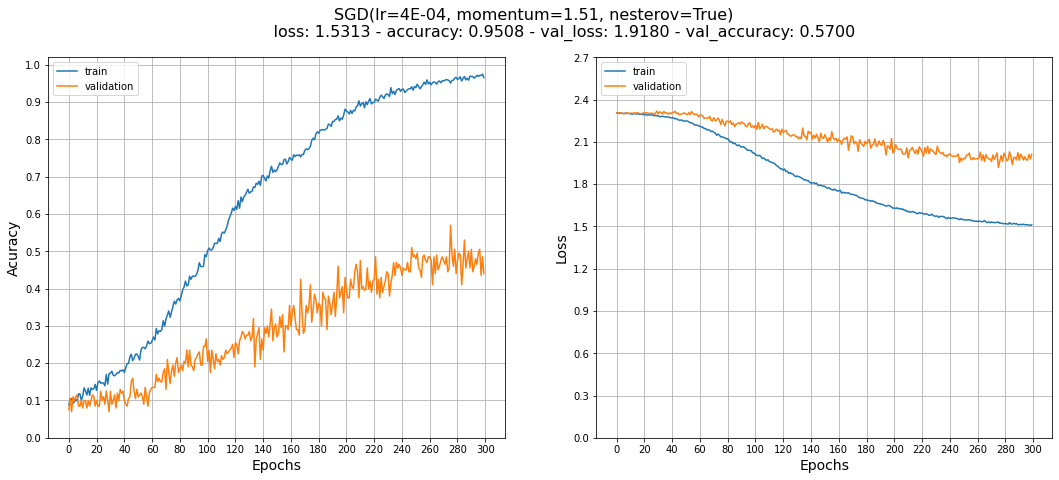

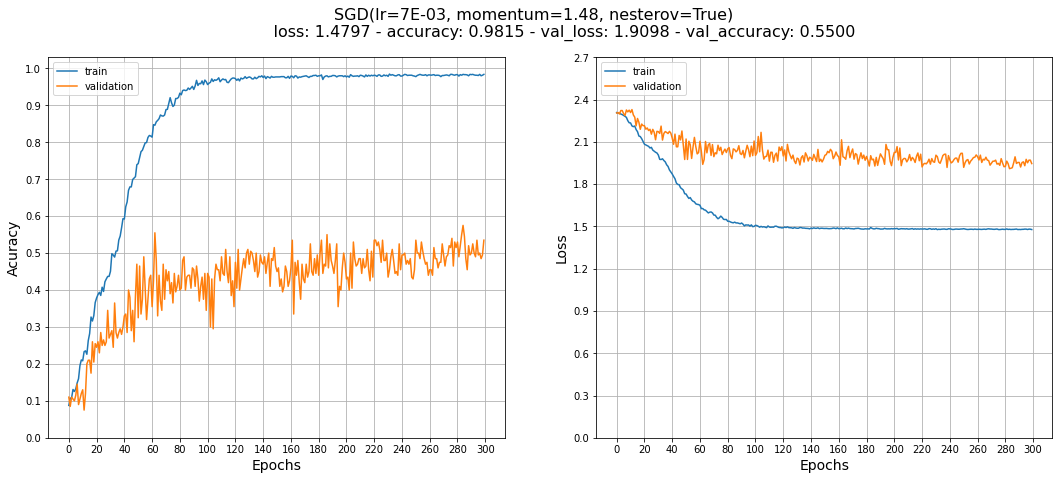

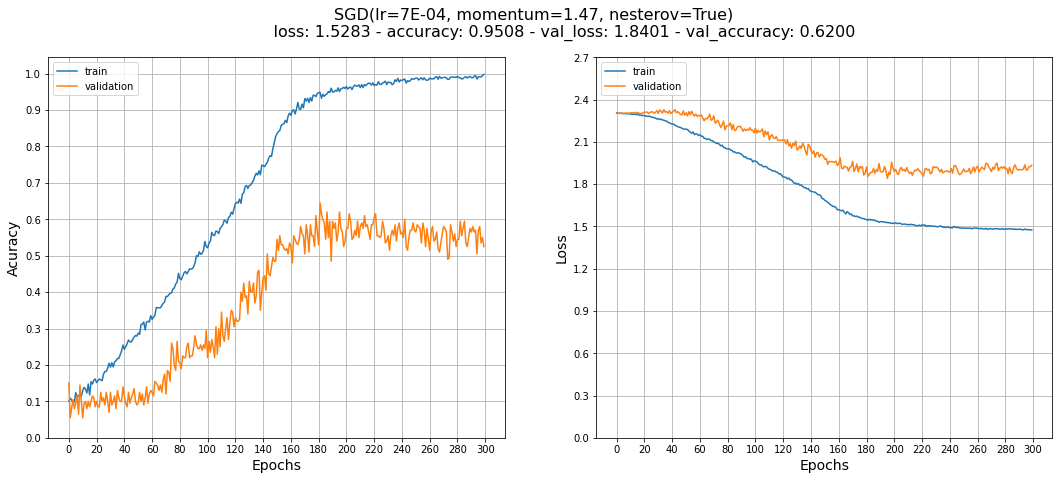

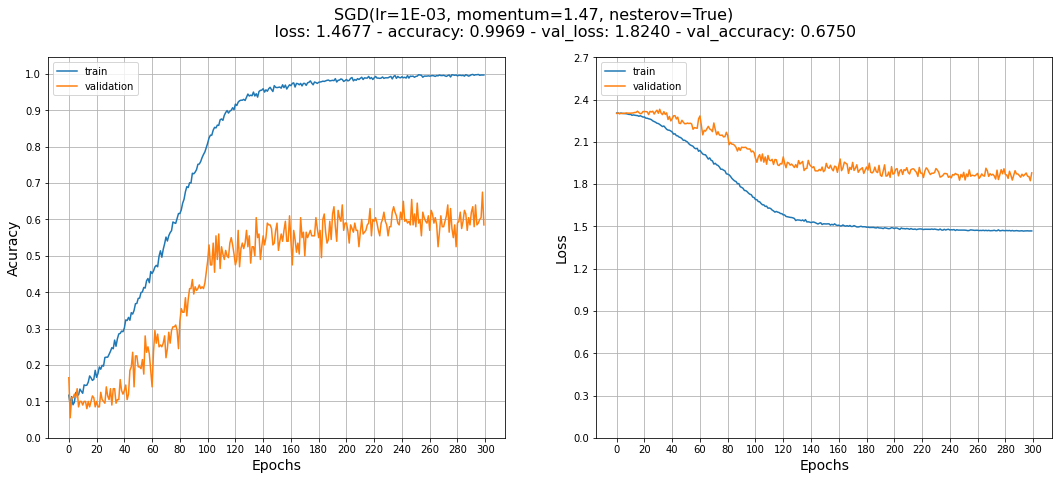

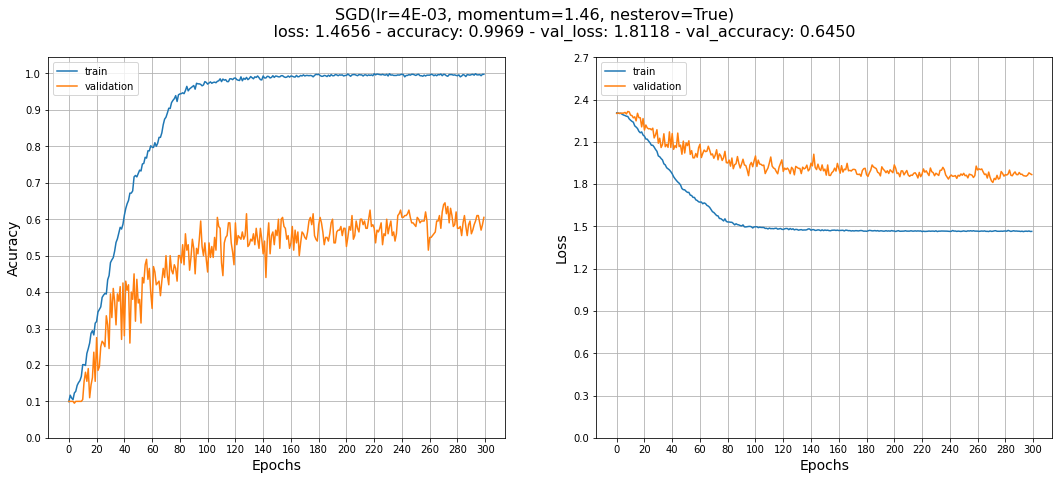

In [5]:
plot_csv()